# Seed-seed functional connectivity

## Load libraries

In [1]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

## Load datasets

In [2]:
# Load fMRI data
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

# Load atlas data
power = datasets.fetch_coords_power_2011()

## Extract signals from parcellation

In [3]:
# Extract coordinates
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

# Create masker object (spheres with 5 radius)
spheres_masker = input_data.NiftiSpheresMasker(
    seeds=coords, radius=5, detrend=True, standardize=True)


# Extract timeseries from ROIs
timeseries = spheres_masker.fit_transform(func_filename)

# Plot shape of timeseries
timeseries.shape

(168, 264)

## Calculate connectivity

In [4]:
connectivity_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = connectivity_measure.fit_transform([timeseries])[0]

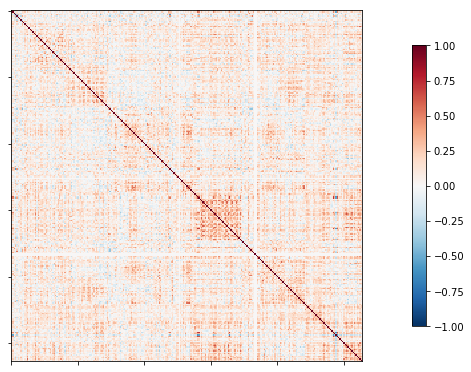

In [5]:
# Plot connectivity matrix (use plot_matrix)
plotting.plot_matrix(correlation_matrix, vmin=-1)

## Plot connectivity matrix

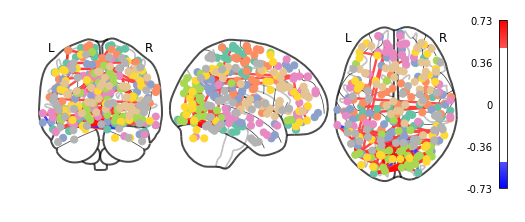

In [6]:
# Using plot_connectome (use plot_connectome)
plotting.plot_connectome(correlation_matrix, coords, edge_threshold=0.5, colorbar=True)

In [7]:
# Using view_connectome
plotting.view_connectome(correlation_matrix, coords, edge_threshold=0.5)

In [26]:
plotting.view_markers(marker_coords=[1,30,80])

## Redo everything with denoising procedure applied 

In [8]:
# Extract timeseries & calculate connectivity measures
timeseries_denoised = spheres_masker.fit_transform(func_filename, confounds=confounds_filename)
connectivity_measure_denoised = ConnectivityMeasure(kind='correlation')
correlation_matrix_denoised = connectivity_measure.fit_transform([timeseries_denoised])[0]

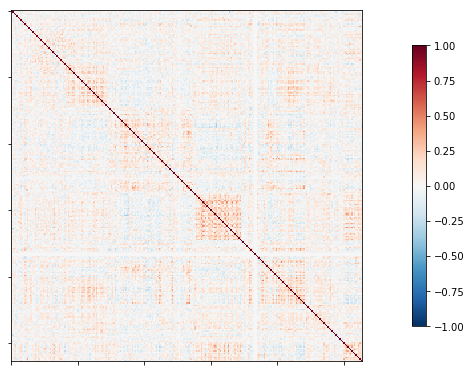

In [9]:
plotting.plot_matrix(correlation_matrix_denoised, vmin=-1)

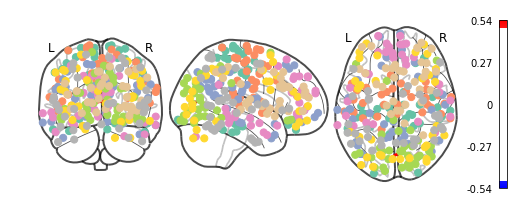

In [10]:
# Using plot_connectome (use plot_connectome)
plotting.plot_connectome(correlation_matrix_denoised, coords, edge_threshold=0.5, colorbar=True)

In [11]:
# Using view_connectome
plotting.view_connectome(correlation_matrix_denoised, coords, edge_threshold=0.45)